# Import Libarays

In [14]:
from skimage.io import imread
from skimage.transform import resize
import os
import math
import cv2 
import numpy as np
# from tqdm import tqdm 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint, History
from keras.optimizers import Adam
from keras.models import load_model
from sklearn.impute import SimpleImputer
from scikeras.wrappers import KerasRegressor,KerasClassifier
from sklearn.model_selection import train_test_split
import tensorflow as tf
%matplotlib inline
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tensorflow.keras.models import load_model,save_model
from sklearn.metrics import mean_squared_error,r2_score


print('compelet')

compelet


# collect data  and understanding 

* **collect dataset**

In [4]:
train_data = pd.read_csv('training.csv')
test_data  = pd.read_csv('test.csv')

* **understanding dataset**

In [5]:
train_data.head(1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [7]:
train_data.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [8]:
train_data.dropna(inplace=True)

In [9]:
x=np.fromstring(train_data['Image'][0], sep=' ')
size = int(math.sqrt(len(x)))
print("the size of image is ",size ,"*",size)


the size of image is  96 * 96


In [10]:
# split label and feature from dataset
def load_data(data ,f):
    data['Image'] = data['Image'].apply(lambda img: np.fromstring(img, sep=' ')).values 
    imgs = np.vstack(data['Image'].values)/255
    imgs = imgs.reshape(data.shape[0], 96, 96)
    imgs = imgs.astype(np.float32)
    
    points = data[data.columns[:-1]].values
    points = points/96 - 0.5
    points = points.astype(np.float32)

    imgs, points = shuffle(imgs, points)

    if (f):
        return imgs, points
    else:
        return imgs
    
imgs_train, points_train = load_data(train_data,True)
imgs_test = load_data(test_data,False)
# del train_data ,test_data

In [11]:
test_data.head()

,ImageId,Image
0,1,"[182.0, 183.0, 182.0, 182.0, 180.0, 180.0, 176..."
1,2,"[76.0, 87.0, 81.0, 72.0, 65.0, 59.0, 64.0, 76...."
2,3,"[177.0, 176.0, 174.0, 170.0, 169.0, 169.0, 168..."
3,4,"[176.0, 174.0, 174.0, 175.0, 174.0, 174.0, 176..."
4,5,"[50.0, 47.0, 44.0, 101.0, 144.0, 149.0, 120.0,..."


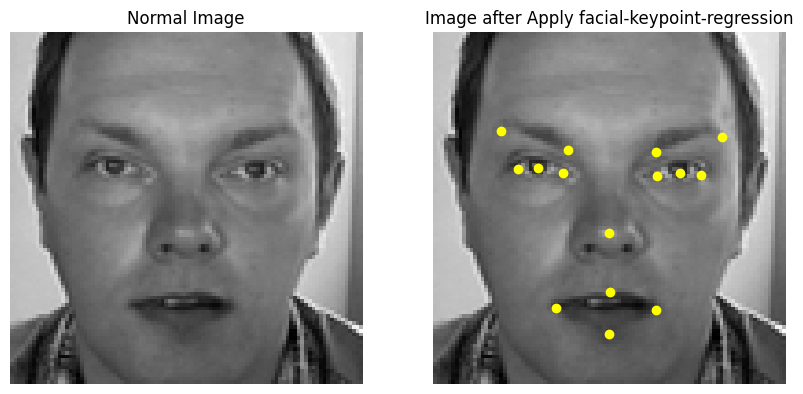

In [12]:
a= 3
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Show Image without Points
ax[0].imshow(imgs_train[a], cmap='gray')

# Show Image with Points
ax[1].imshow(imgs_train[a], cmap='gray')
for i in range(0,30,2):
        # return Scaled Point to it's original and apply Sactterplot
        ax[1].scatter((points_train[a][i] + 0.5)*96, (points_train[a][i+1]+0.5)*96, color='yellow')
        
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[0].set_title('Normal Image')
ax[1].set_title('Image after Apply facial-keypoint-regression')
plt.show()

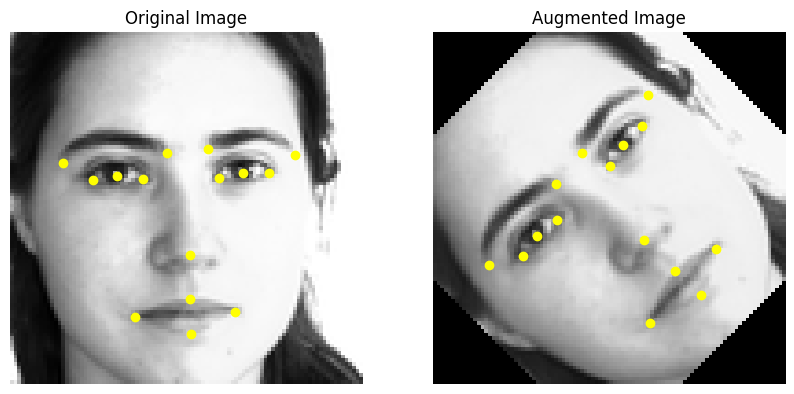

In [16]:
from scipy.ndimage import rotate
def imge_points_ax(img_1, points_1 ,img_2 ,points_2):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # display image_1
    ax[0].imshow(img_1, cmap='gray')
    for i in range(0,30,2):
        # return Scaled Point to it's original and apply Sactterplot
        ax[0].scatter((points_1[i] + 0.5)*96, (points_1[i+1]+0.5)*96, color='yellow')
        
    # display image_2
    ax[1].imshow(img_2, cmap='gray')
    for i in range(0,30,2):
        # return Scaled Point to it's original and apply Sactterplot
        ax[1].scatter((points_2[i] + 0.5)*96, (points_2[i+1]+0.5)*96, color='yellow')
        
    ax[0].set_axis_off()
    ax[1].set_axis_off()
    ax[0].set_title('Original Image')
    ax[1].set_title('Augmented Image')
def rotate_image_and_points(img, points, angle_degrees):
    # Rotate the image
    rotated_img = rotate(img, angle_degrees, reshape=False)

    # Convert angle to radians for point rotation
    angle_radians = np.deg2rad(360-angle_degrees)

    # Rotate each point
    rotated_points = np.copy(points)
    for i in range(0, 30, 2):
        x, y = points[i], points[i + 1]
        x_rotated = x * np.cos(angle_radians) - y * np.sin(angle_radians)
        y_rotated = x * np.sin(angle_radians) + y * np.cos(angle_radians)
        rotated_points[i], rotated_points[i + 1] = x_rotated, y_rotated

    return rotated_img, rotated_points

# Example usage
rotated_img, rotated_points = rotate_image_and_points(imgs_train[20], points_train[20], angle_degrees=45)
imge_points_ax(imgs_train[20], points_train[20], rotated_img, rotated_points)

In [14]:
data=[(x,y) for x,y in zip(imgs_train,points_train) ]

In [18]:
final_data=[]
for i in range(0,len(data)):
    aug_img, aug_point = rotate_image_and_points(data[i][0],data[i][1],45)
    aug_img2, aug_point2 = rotate_image_and_points(data[i][0],data[i][1],315)
    final_data.append((aug_img, aug_point))
    final_data.append((data[i][0],data[i][1]))
    final_data.append((aug_img2, aug_point2))
    

In [19]:
len(final_data)

6420

In [23]:
def plot_keypoints(img, points):
    # display image
    plt.imshow(img, cmap='gray')
    # plot the keypoints
    for i in range(0,30,2):
        plt.scatter((points[i] + 0.5)*96, (points[i+1]+0.5)*96, color='yellow')

In [29]:
img=[]
point=[]
for i in range(0,len(final_data)):
   img.append(final_data[i][0])
   point.append(final_data[i][1]) 


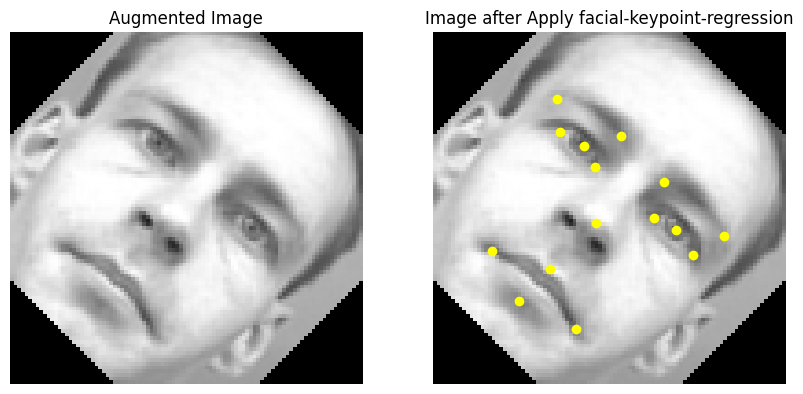

In [33]:
a= 5000
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Show Image without Points
ax[0].imshow(img[a], cmap='gray')

# Show Image with Points
ax[1].imshow(img[a], cmap='gray')
for i in range(0,30,2):
        # return Scaled Point to it's original and apply Sactterplot
        ax[1].scatter((point[a][i] + 0.5)*96, (point[a][i+1]+0.5)*96, color='yellow')
        
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[0].set_title('Augmented Image')
ax[1].set_title('Image after Apply facial-keypoint-regression')
plt.show()

In [34]:

img=np.array(img)
points=np.array(point)
img=img.reshape(img.shape[0],96,96,1)
img.shape

(6420, 96, 96, 1)

In [35]:
X_train,X_test,y_train,y_test=train_test_split(img,points,test_size=0.2,random_state=42)

In [36]:
# model architecture
model = Sequential()

# Feature Extraction Layers
model.add(Conv2D(filters=32 ,kernel_size=3 ,padding='same' ,activation='relu',input_shape=(96, 96, 1)))
model.add(MaxPooling2D(pool_size=(3, 3) ,padding='same' ))

model.add(Conv2D(filters=256, kernel_size=3 ,activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3) ,padding='same'))

model.add(Conv2D(filters=512, kernel_size=3, activation='relu' ,padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3) ,padding='same' ))

# Input Layers
model.add(Flatten())
# Hidden layers
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.12))
# output layer
model.add(Dense(30,activation='linear'))

model.summary()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

C:\Users\legion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 96, 96, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 256)    │        73,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │        30,750 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,674,846 (36.91 MB)

 Trainable params: 9,674,846 (36.91 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:

# Define the path where you want to save the model's weights
MODEL_PATH = 'isa.weights.h5'

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath=MODEL_PATH,
                                      save_best_only=True,
                                      save_weights_only=True,
                                      mode='min',
                                      monitor='loss',
                                      verbose=1)

# Define the History callback
history = History()

# Train the model with both callbacks
hist = model.fit(X_train, 
                    y_train, 
                    epochs=100, 
                    batch_size=256, 
                    validation_split=0.1, 
                    callbacks=[checkpoint, history])


Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 0.0901 - mae: 0.2088
Epoch 1: loss improved from inf to 0.05069, saving model to isa.weights.h5
19/19 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - loss: 0.0882 - mae: 0.2062 - val_loss: 0.0163 - val_mae: 0.1060
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 0.0158 - mae: 0.1014
Epoch 2: loss improved from 0.05069 to 0.01534, saving model to isa.weights.h5
19/19 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - loss: 0.0158 - mae: 0.1013 - val_loss: 0.0139 - val_mae: 0.0917
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 0.0140 - mae: 0.0934
Epoch 3: loss improved from 0.01534 to 0.01382, saving model to isa.weights.h5
19/19 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - loss: 0.0140 - mae: 0.0934 - val_loss: 0.0120 - val_mae: 0.0849
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 0.0114 - mae: 0.0825
Epoch 4: loss improved from 0.01382 to 0.01015, saving model to isa.weights.h5
19/19 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - loss: 0.0113 - m

In [38]:
# model.load_weights('isa.weights.h5')


# save_model(model, "isa.h5")


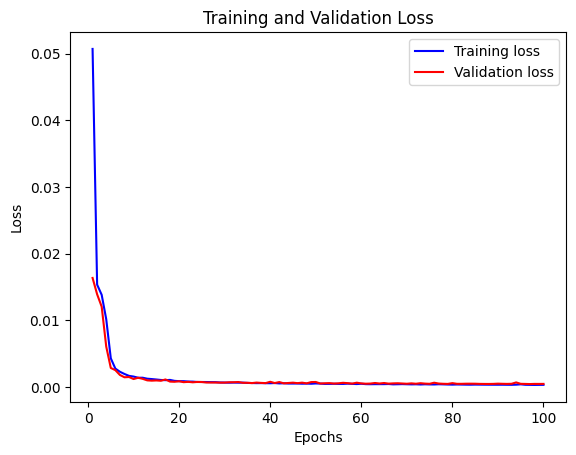

In [39]:
# Store the training history for later analysis
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [41]:
imgs_test=imgs_test.reshape(imgs_test.shape[0],96,96,1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step


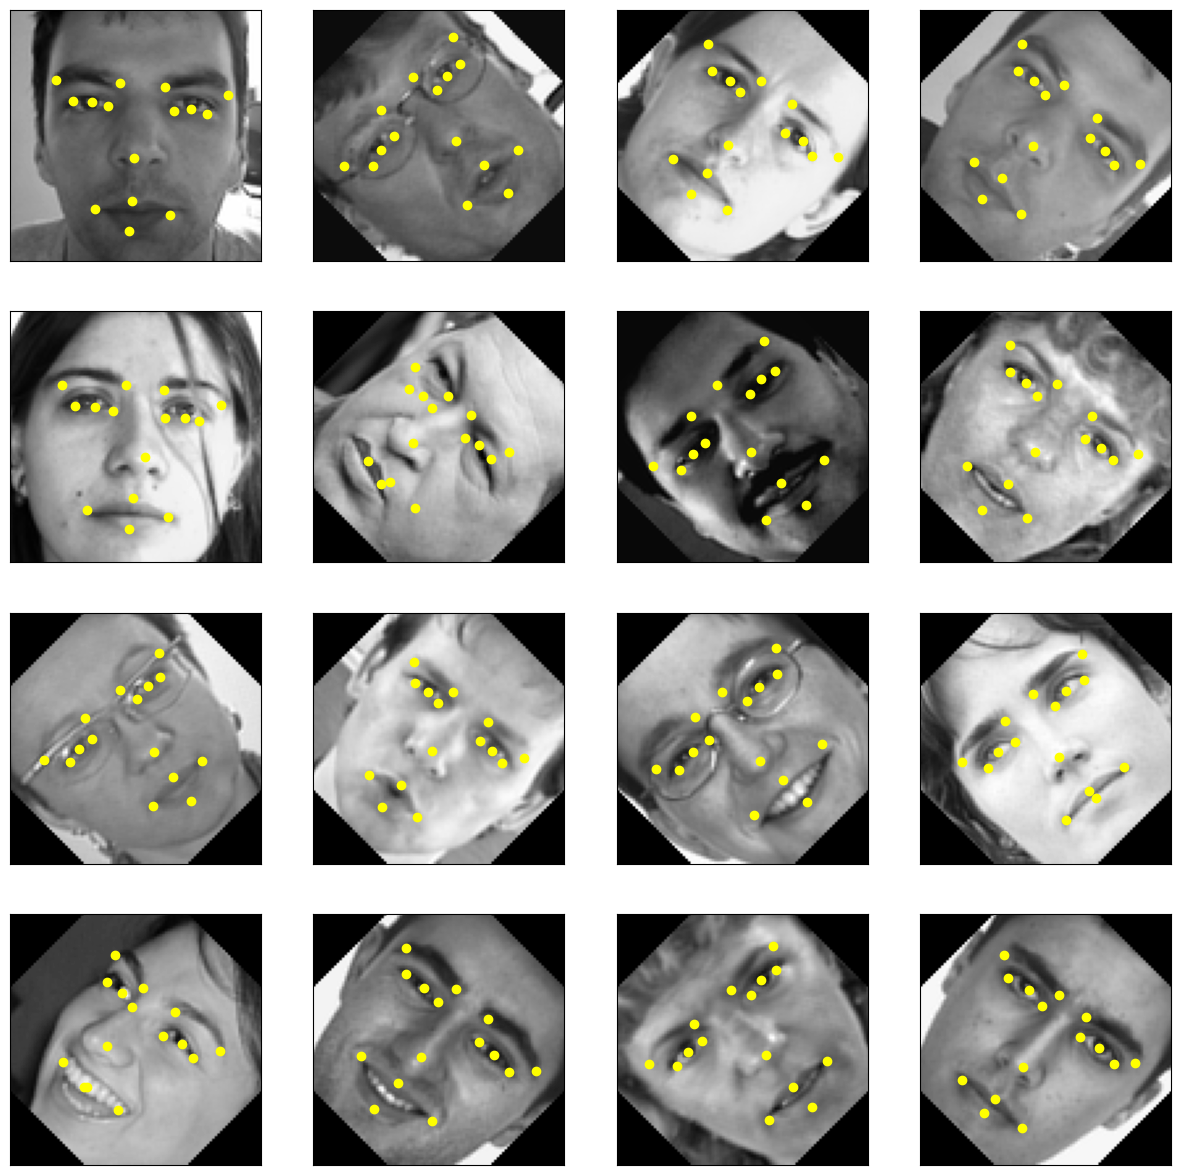

In [44]:
fig = plt.figure(figsize=(15,15))
# make test images keypoints prediction
x=181
points_test = model.predict(X_test)
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_keypoints(X_test[i+x], np.squeeze(points_test[i+x]))

In [49]:
y=model.predict(X_test)
mse = mean_squared_error(y_test, y)
r2 = r2_score(y_test,y)
mse,r2

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step


(0.00051139353, 0.9393116283925084)

In [50]:
loss, mae = model.evaluate(X_test, y_test)

print("Mean Squared Error:", loss)
print("Mean AbsoluteError:",mae)

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 5.5140e-04 - mae: 0.0159
Mean Squared Error: 0.0005113937077112496
Mean AbsoluteError: 0.01548768300563097


In [17]:
model = load_model('isa.h5')
model.load_weights('isa.weights.h5')

C:\Users\legion\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


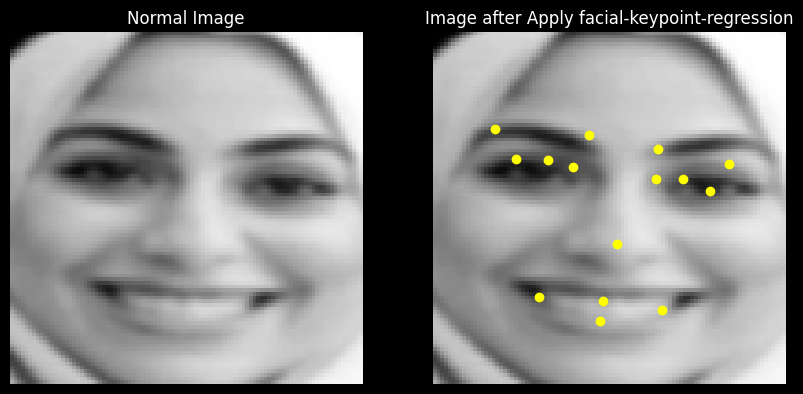

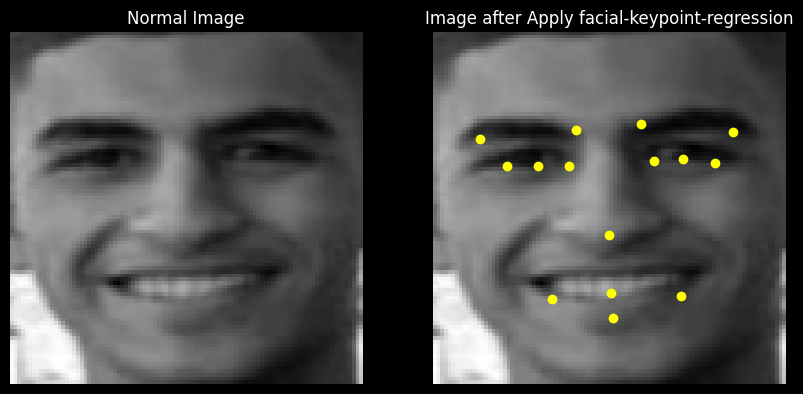

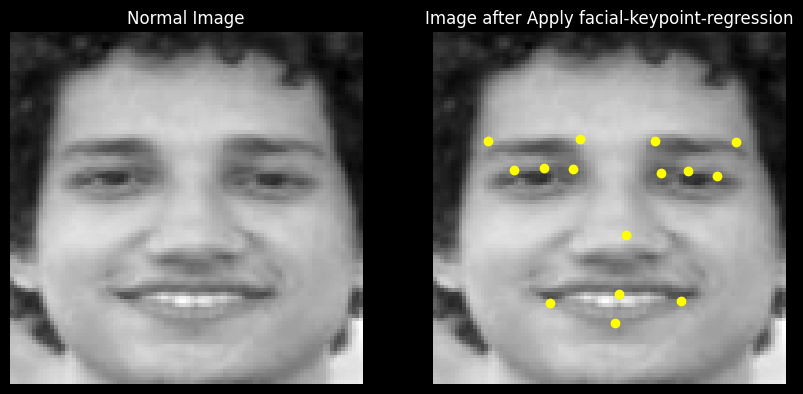

In [18]:
def deploy(path):
    # Clear the label
    label.config(text="")

    # Clear any existing Matplotlib figure
    for widget in root.winfo_children():
        if isinstance(widget, FigureCanvasTkAgg):
            widget.get_tk_widget().grid_forget()

    image = cv2.imread(path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    reshaped_image = cv2.resize(gray_image, (96, 96))
    reshaped_image = reshaped_image.reshape(96, 96, 1)
    
    scaled_image = reshaped_image / 255.0
    test = np.array(scaled_image)

    points_test = model.predict(np.array([test]))
    points_test = np.squeeze(points_test)

    # Create a Matplotlib figure
    fig, ax = plt.subplots(1, 2, figsize=(10, 5), facecolor='black')  # Set figure background color to black

    # Show Image without Points
    ax[0].imshow(test, cmap='gray')
    ax[0].set_axis_off()
    ax[0].set_title('Normal Image', color='white')  # Set title color to white

    # Show Image with Points
    ax[1].imshow(test, cmap='gray')
    for i in range(0, 30, 2):
        ax[1].scatter((points_test[i] + 0.5) * 96, (points_test[i + 1] + 0.5) * 96, color='yellow')
    ax[1].set_axis_off()
    ax[1].set_title('Image after Apply facial-keypoint-regression', color='white')  # Set title color to white

    # Set tick labels color to white
    for axis in ax:
        axis.tick_params(axis='x', colors='white')
        axis.tick_params(axis='y', colors='white')

    # Convert the Matplotlib figure to a Tkinter-compatible format
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.grid(row=1, column=0, pady=10, padx=10)  # Place the new image in the same position

def choose_image():
    # Clear the label
    label.config(text="")
    
    file_path = filedialog.askopenfilename(filetypes=[("Image files", ".gif;.ppm;.png;.jpg;*.jpeg")])
    deploy(file_path)

root = tk.Tk()
root.title("Insert Your Image")
root.geometry('2000x2000+5+5')
root.configure(bg='#000000')  # Set background color to black

label = tk.Label(root, bg='#000000')  # Set label background color to black
label.grid(row=0, column=0, pady=10, padx=10)  # Place the label in the grid

button = tk.Button(root, text="Choose Image", command=choose_image)
button.grid(row=2, column=0, pady=10, padx=10)  # Place the button in the grid

root.mainloop()
